In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp, ode
import time as tm

/var/folders/8j/_z3hb0md2ts8q3jtwg2ty3j00000gn/T/ipykernel_30721/2915219623.py:10: RuntimeWarning: invalid value encountered in log
  dx[1] = y1 * (4 * x1 - 2) * (1 - y1) + T * y1 * (1 - y1) * np.log( (1-y1) / y1)
/var/folders/8j/_z3hb0md2ts8q3jtwg2ty3j00000gn/T/ipykernel_30721/2915219623.py:9: RuntimeWarning: invalid value encountered in log
  dx[0] = x1 * (1 - x1) * (4 * y1 - 2) + T * x1 * (1 - x1) * np.log( (1-x1) /x1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


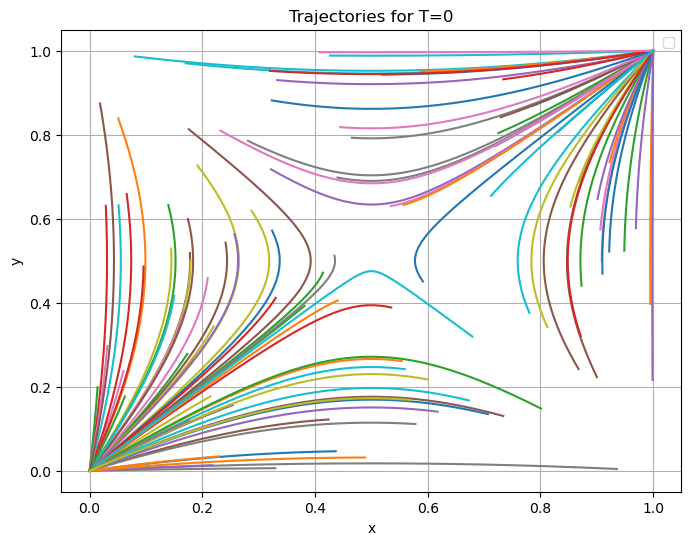

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the replicator function
def replicator(t, x, A, B, T):
    x1, y1 = x
    dx = np.zeros(2)
    dx[0] = x1 * (1 - x1) * (4 * y1 - 2) + T * x1 * (1 - x1) * np.log( (1-x1) /x1)
    dx[1] = y1 * (4 * x1 - 2) * (1 - y1) + T * y1 * (1 - y1) * np.log( (1-y1) / y1)
    return dx

# Set up parameters
A = np.array([[6, 0], [4, 2]])
B = A.T

# Time settings
t_step = 0.01
t_final = 10
time = np.arange(0, t_final, t_step)


# Single value of T
T_value = 0

# Initial values, 100 randomised in two dimensions; one for x, one for y
initial_values = np.zeros([100,2])
for i in range(100):
    initial_values[i,:] = np.random.uniform(0,1,2)

# Plot the portrait
plt.figure(figsize=(8, 6))

for z0 in initial_values:
    sol = solve_ivp(replicator, [0, t_final], y0=z0, args=(A, B, T_value), method='DOP853', t_eval=time)
    xx = sol.y
    plt.plot(xx[0, :], xx[1, :])

# Plot config.
plt.title(f'Trajectories for T={T_value}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
